In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

R2 score: 0.4432656826567969


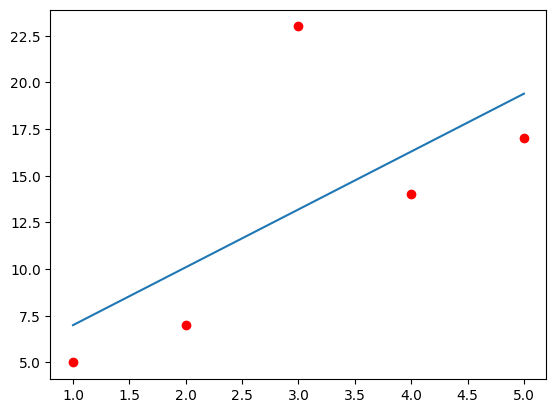

In [7]:
def mean(x):
    return(sum(x)/len(x))
def least_squared(x , y):
    q0 = 1
    q1 = 1
    a = 0.08
    it = 1000
    for i in range(it):
        y_predicted = q0 + q1 * x
        q1 = q1 + a*(1/len(x))*(sum(x*(y-y_predicted)))
        q0 = q0 + a*(1/len(x))*(sum(y-y_predicted))
    plt.plot(x,y_predicted)
    sst = sum([i*i for i in (y-mean(y))])
    ssr = sum([(y[i]-y_predicted[i])**2 for i in range(len(y))])
    print("R2 score:", 1-ssr/sst)
x = np.array([1,2,3,4,5])
y= np.array([5,7,23,14,17])
least_squared(x ,y )
plt.scatter(x,y,c='red')
df = pd.read_csv("/home/captaint/Downloads/ds/diabetes.csv")
x = np.array(df.iloc[:,0:8])
y = df['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y):
    n_samples, n_features = X.shape
    thetam = np.zeros(n_features)
    bias = 0
    a = 0.001
    iterations = 500
    for i in range(iterations):
        xtheta = np.dot(X, thetam) + bias
        y_predicted = sigmoid(xtheta)

        dxtheta = (1/n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1/n_samples) * np.sum(y_predicted - y)

        thetam = thetam - a*dxtheta
        bias = bias - a*db
    return thetam,bias
    
def predict(X,y,thetam, bias):
    linear_model = np.dot(X, thetam) + bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    print(y_predicted_cls)
    count = 0
    for i in range(len(y_predicted_cls)):
        if(y_predicted_cls[i] == np.array(y)[i]):
            count+=1
    print(count, len(y))
thetam,bias = gradient_descent(xtrain,ytrain)
predict(xtest,ytest,thetam,bias)

In [8]:
df = pd.read_csv("/home/captaint/Downloads/ds/diabetes.csv")
x = np.array(df.iloc[:,0:8])
y = df['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y):
    n_samples, n_features = X.shape
    thetam = np.zeros(n_features)
    bias = 0
    a = 0.001
    iterations = 500
    for i in range(iterations):
        xtheta = np.dot(X, thetam) + bias
        y_predicted = sigmoid(xtheta)

        dxtheta = (1/n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1/n_samples) * np.sum(y_predicted - y)

        thetam = thetam - a*dxtheta
        bias = bias - a*db
    return thetam,bias
    
def predict(X,y,thetam, bias):
    linear_model = np.dot(X, thetam) + bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    print(y_predicted_cls)
    count = 0
    for i in range(len(y_predicted_cls)):
        if(y_predicted_cls[i] == np.array(y)[i]):
            count+=1
    print(count, len(y))
thetam,bias = gradient_descent(xtrain,ytrain)
predict(xtest,ytest,thetam,bias)

FileNotFoundError: [Errno 2] No such file or directory: '/home/captaint/Downloads/ds/diabetes.csv'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def forward_propagation(X, w, b):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    return A

def compute_cost(A, Y):
    m = Y.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

def backward_propagation(X, Y, A):
    m = Y.shape[1]
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    return dw, db

def update_parameters(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

def logistic_regression(X, Y, num_iterations, learning_rate):
    costs = []
    w, b = initialize_parameters(X.shape[0])

    for i in range(num_iterations):
        A = forward_propagation(X, w, b)
        cost = compute_cost(A, Y)
        dw, db = backward_propagation(X, Y, A)
        w, b = update_parameters(w, b, dw, db, learning_rate)

        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost}")

    return w, b, costs

# Example usage:
X = np.array([[1, 2, 3, 4, 5], [1, 1, 1, 1, 1]])  # Input features
Y = np.array([[0, 0, 1, 1, 1]])  # Target labels

w, b, costs = logistic_regression(X, Y, num_iterations=1000, learning_rate=0.01)

# Plot the cost over iterations
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()
